# 데이터 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 데이터 준비

In [2]:
df = pd.read_csv("../data/ch2_scores_em.csv",
				 index_col="student number")
english_scores = df["english"]
math_scores = df["mathematics"]

## 2. 데이터 시각화

### 2-1. 회귀 직선

**np.polyfit()** : x(english_score)와 y(math_scores)의 관계를 1차 방정식으로 근사함.  
ex) y = a*x + b  
즉, '가장 잘 맞는 직선'의 기울기와 절편을 구하는 함수  
반환값 : [x,b] (계수 배열)

In [3]:
poly_fit = np.polyfit(english_scores, math_scores, 1)

**np.poly1d()** : 계수 배열을 **다항식 객체**로 바꿈  
poly_1d를 함수처럼 호출할 수 있게 만듬

In [4]:
poly_1d = np.poly1d(poly_fit)

**np.linspace()** : x부터 y까지 일정 간격으로 num개의 값을 생성함 (num기본값 : 50)

In [5]:
xs = np.linspace(english_scores.min(), english_scores.max())

polyfit으로 만든 다항식을 적용하여 결과를 반환

In [6]:
ys = poly_1d(xs)

### 2-2. 회귀 직선 그래프 표시

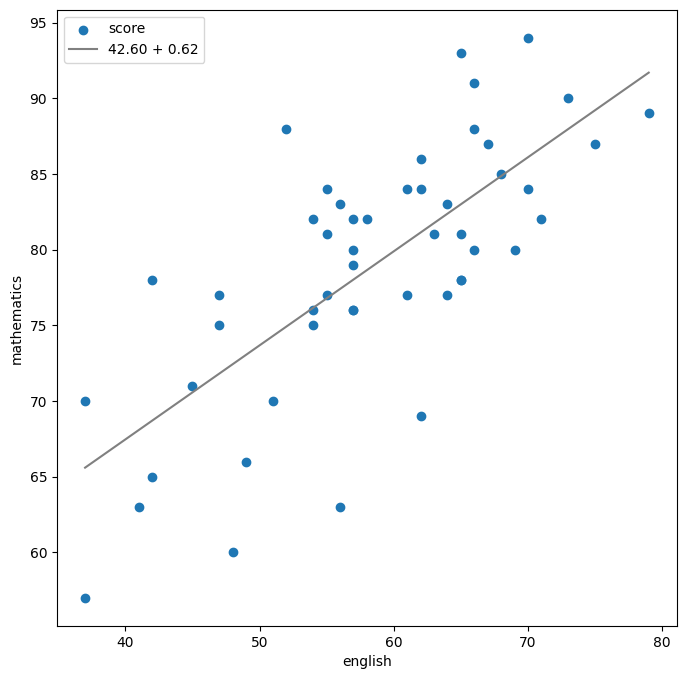

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# 데이터 산점도
ax.scatter(english_scores, math_scores, label="score")
ax.plot(xs,ys, color="gray", label=f"{poly_fit[1]:.2f} + {poly_fit[0]:.2f}")
ax.set_xlabel("english")
ax.set_ylabel("mathematics")
ax.legend(loc="upper left")

### 2-3 히트맵

**ax.hist2d(x, y, bins, range)** : 히트맵을 시각화하는 함수  
bins : 계급의 개수 ([9,8] = 9열 8행)  
range : x,y축의 범위 설정 ([(35,80),(55,95)] = x축은 35~80 y축은 55~95)  

**반환값**  
1. 2D 히스트로그램의 빈도값 배열 (shape=[x_bin, y_bin])  
2. x축 구간 경계값 (길이 : x_bin + 1)  
3. y축 구간 경계값 (길이 : y_bin + 1)  
4. 실제로 그려진 그래프 객체


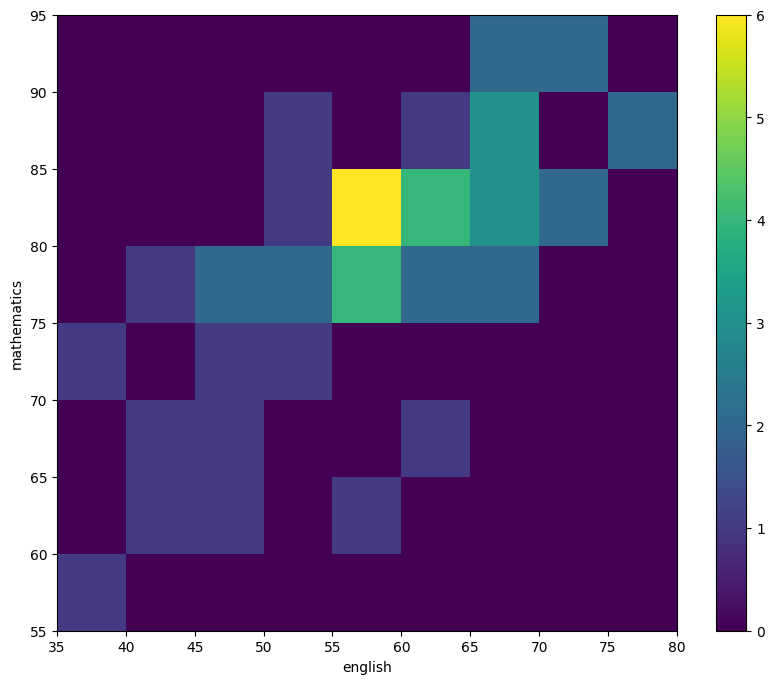

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9,8], range=[(35,80),(55,95)])

ax.set_xlabel("english")
ax.set_ylabel("mathematics")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)	# 2D 히스토그램 객체를 전달하여 컬러바 추가
plt.show()